# Génération des données


In [5]:
import numpy as np
from sklearn.datasets import make_blobs

# Paramètres de génération des données
nb_echantillons = 1500
random_state = 170 
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

# Génération d'un ensemble de données en blobs
X, y = make_blobs(n_samples=nb_echantillons, random_state=random_state)

# Application d'une transformation pour créer des clusters anisotropes
X_aniso = np.dot(X, transformation)

# Génération d'un autre ensemble avec des variances différentes
X_varied, y_varied = make_blobs(
    n_samples=nb_echantillons,
    cluster_std=[1.0, 2.5, 0.5],  # Variances variées
    random_state=random_state
)

# Filtrage des données pour créer un déséquilibre des classes
X_filtered = np.vstack(
    (
        X[y == 0][:500],  # 500 échantillons de la classe 0
        X[y == 1][:100],  # 100 échantillons de la classe 1
        X[y == 2][:10]    # 10 échantillons de la classe 2
    )
)

# Création des étiquettes correspondantes
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

# Création des étiquettes correspondantes pour les échantillons filtrés
# y_filtre contient 500 étiquettes de 0, 100 étiquettes de 1, et 10 étiquettes de 2
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

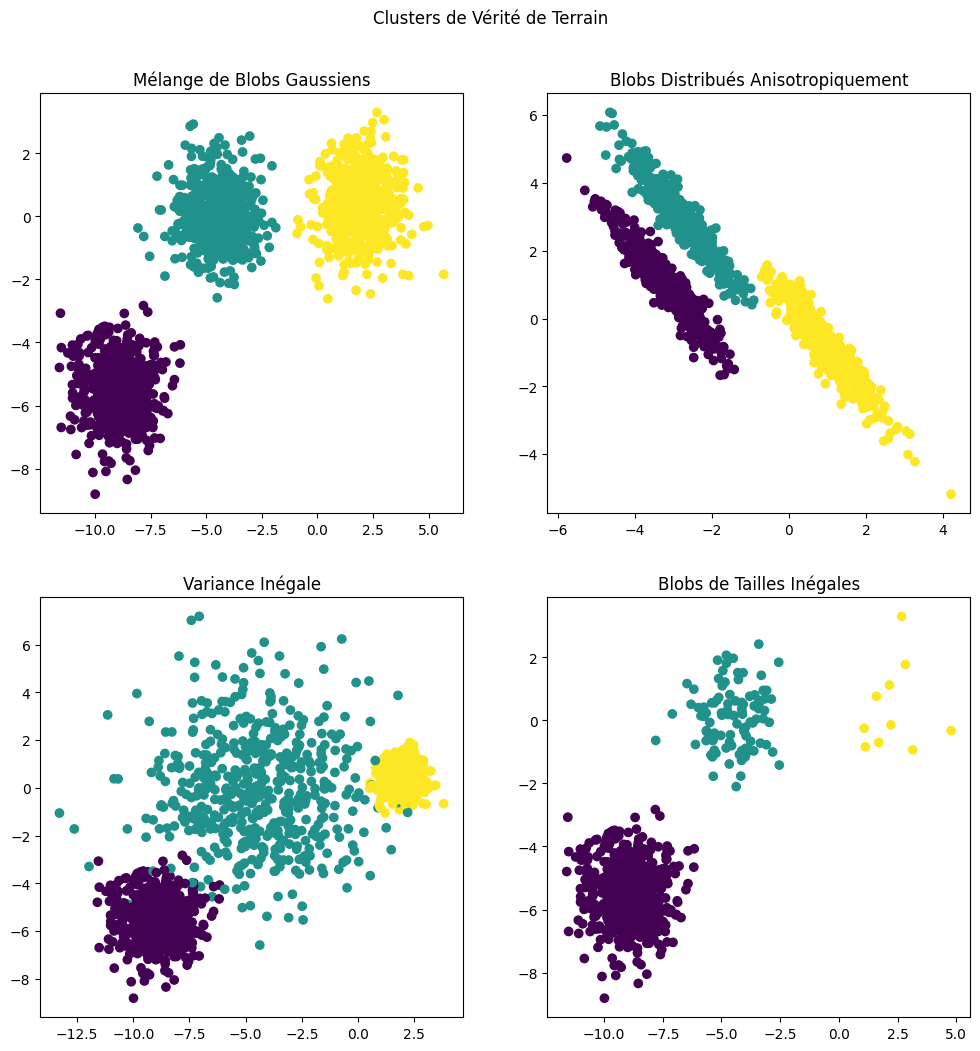

In [9]:
import matplotlib.pyplot as plt

# Création d'une figure avec 4 sous-graphiques
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Premier graphique : affichage des blobs gaussiens
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mélange de Blobs Gaussiens")

# Deuxième graphique : affichage des blobs anisotropes
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Blobs Distribués Anisotropiquement")

# Troisième graphique : affichage des blobs avec variances inégales
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Variance Inégale")

# Quatrième graphique : affichage des blobs de tailles inégales
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Blobs de Tailles Inégales")

plt.suptitle("Clusters de Vérité de Terrain").set_y(0.95)
plt.show()

# Ajuster les modèle et tracer les résultats

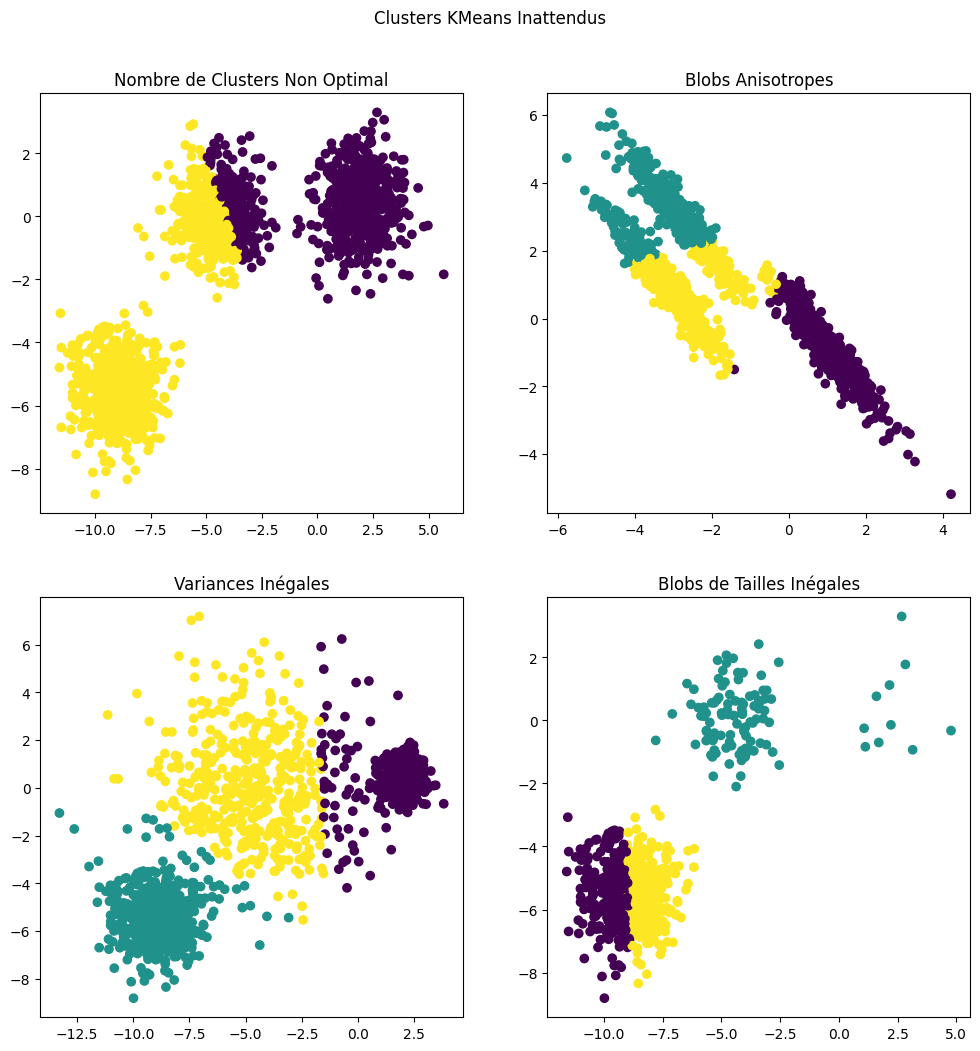

In [12]:
from sklearn.cluster import KMeans

# Dictionnaire de paramètres communs pour KMeans
params_commun = {
    "n_init": "auto",  # Initialisation automatique des centres
    "random_state": random_state,  # État aléatoire pour la reproductibilité
}

# Création d'une figure avec 4 sous-graphiques
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

# Premier graphique : KMeans avec un nombre non optimal de clusters
y_pred = KMeans(n_clusters=2, **params_commun).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Nombre de Clusters Non Optimal")

# Deuxième graphique : KMeans sur des blobs anisotropes
y_pred = KMeans(n_clusters=3, **params_commun).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Blobs Anisotropes")

# Troisième graphique : KMeans sur des données avec variances inégales
y_pred = KMeans(n_clusters=3, **params_commun).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Variances Inégales")

# Quatrième graphique : KMeans sur des blobs de tailles inégales
y_pred = KMeans(n_clusters=3, **params_commun).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Blobs de Tailles Inégales")

plt.suptitle("Clusters KMeans Inattendus").set_y(0.95)
plt.show()


- Nombre non optimal de clusters :
Dans la réalité, le nombre exact de clusters n'est pas toujours connu.
Il faut déterminer un nombre approprié de clusters en se basant sur des critères liés aux données et à l'objectif visé.

- Blobs distribués anisotropiquement :
Les k-moyennes minimisent les distances euclidiennes par rapport aux centroïdes des clusters.
Cette méthode est plus adaptée aux clusters isotropes (sphériques et gaussiens).

- Variance inégale :
Les k-moyennes peuvent être vues comme un estimateur du maximum de vraisemblance pour un mélange de distributions gaussiennes avec des moyennes différentes mais des variances égales.

- Taches de taille inégale :
Il n'y a pas de preuve théorique que les k-moyennes nécessitent des clusters de taille similaire pour fonctionner correctement.
Cependant, minimiser les distances euclidiennes dans des espaces de grande dimension peut nécessiter plusieurs exécutions de l'algorithme avec différentes initialisations des centroïdes pour garantir une inertie minimale globale.

# Solutions possibles

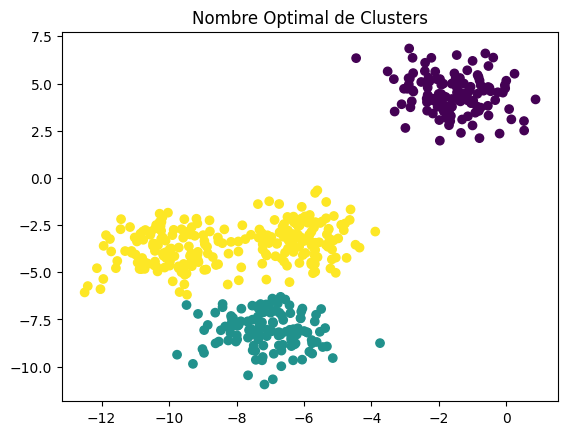

In [25]:
y_pred = KMeans(n_clusters=3, **params_commun).fit_predict(X) #(voir la sélection du nombr de clusters avec la silhouette)

plt.scatter(X[: , 0], X[: , 1], c=y_pred)
plt.title("Nombre Optimal de Clusters")
plt.show()

- Pour trouver le nombre optimal de clusters on peu utiliser l'analyse de silhouette

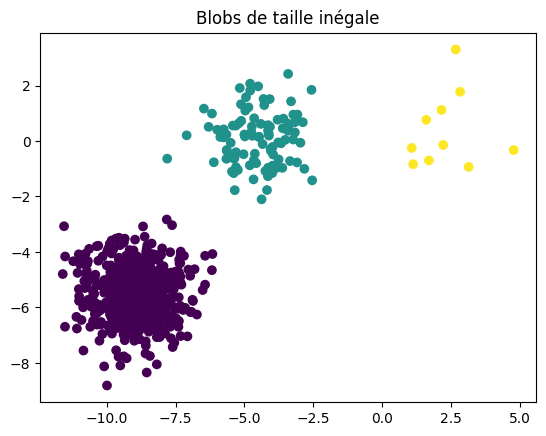

In [ ]:
y_pred = KMeans(n_clusters=3, n_init=10, random_state=random_state).fit_predict(X_filtered) # Augmentation du nombre d'initialisations

plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Blobs de taille inégale")
plt.show()

- Pour traiter des blobs de taille inégale, on peut augmenter le nombre d'initialisations. 

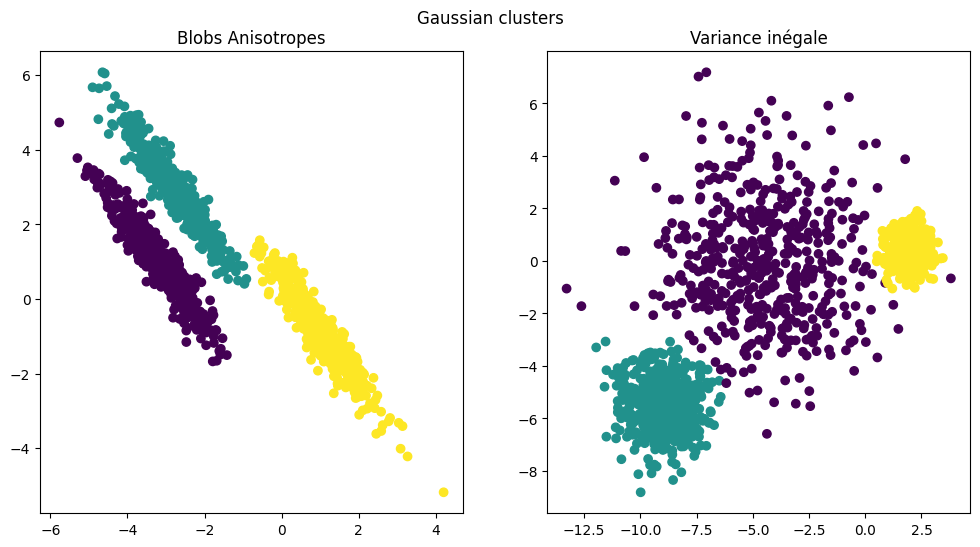

In [ ]:
from sklearn.mixture import GaussianMixture

# Création d'une figure avec 2 sous-graphiques
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Application du modèle de mélange gaussien sur les données anisotropes
y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)  
ax1.set_title("Blobs Anisotropes")  

# Application du modèle de mélange gaussien sur les données avec variance inégale
y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
ax2.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)  
ax2.set_title("Variance inégale") 

plt.suptitle("Gaussian clusters").set_y(0.95)
plt.show()

- L'algorithme KMeans est limité lorsqu'il s'agit de variances anisotropes et inégales. Il est recommandé d'utiliser plutôt un modèle de mélange gaussien, qui permet de créer des clusters sans contrainte sur leurs variances. Il reste toutefois nécessaire de déterminer le bon nombre de clusters.